# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 18

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,51,15.090909,83,69.672532,5.5,4.616855,5.264045,4.788501,2.044378
96,Pope,Burnley,54,14.905660,79,70.120122,5.3,4.704261,4.280683,4.425567,2.024392
431,Fabianski,West Ham,51,16.136364,71,69.222622,4.4,4.289853,3.724080,4.408621,1.899579
383,Lloris,Tottenham,56,16.888889,76,74.619959,4.5,4.418287,4.132915,4.474360,1.867067
363,McCarthy,Southampton,47,16.136364,71,63.139112,4.4,3.912846,4.866773,3.786920,1.804861
325,Darlow,Newcastle Utd,50,17.027027,63,68.195121,3.7,4.005110,3.730538,3.983978,1.791140
8,Leno,Arsenal,50,17.804878,73,70.450905,4.1,3.956832,4.838128,3.995768,1.769549
128,Guaita,Crystal Palace,48,18.235294,62,68.804529,3.4,3.773152,5.319657,3.735419,1.722200
516,Areola,Fulham,45,15.142857,53,54.515313,3.5,3.600068,4.901508,3.642142,1.697088


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,21.549346,7.0,5.387336,6.419302,5.424205,2.568312
277,Cancelo,Manchester City,58,11.960784,61,62.011444,5.1,5.184563,6.339293,5.388530,2.152773
273,Stones,Manchester City,50,8.000000,44,35.263029,5.5,4.407879,4.964293,4.571187,1.971263
283,Zinchenko,Manchester City,55,2.972973,11,13.314639,3.7,4.478560,5.933811,4.654598,1.909665
75,Bernardo,Brighton,39,2.941176,5,11.083977,1.7,3.768552,3.936799,3.670289,1.908281
470,Kilman,Wolves,41,10.000000,37,38.252861,3.7,3.825286,1.959636,4.001798,1.889174
123,James,Chelsea,51,13.095238,55,54.704839,4.2,4.177460,1.789826,4.312224,1.849811
246,Matip,Liverpool,54,8.000000,40,34.336420,5.0,4.292053,6.223573,4.180037,1.847005
558,Coufal,West Ham,47,13.000000,52,51.083863,4.0,3.929528,3.521823,4.086082,1.812556


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
272,De Bruyne,Manchester City,118,15.000000,87,107.720727,5.8,7.181382,7.654797,7.438770,2.090581
37,Grealish,Aston Villa,77,14.923077,97,86.225525,6.5,5.777999,6.109345,5.622764,2.082246
302,Fernandes,Manchester Utd,113,16.923077,132,116.907017,7.8,6.908142,8.465692,6.834588,2.055048
23,Smith Rowe,Arsenal,45,4.038462,21,17.519464,5.2,4.338153,4.500796,4.247913,2.045025
40,Trézéguet,Aston Villa,52,8.928571,25,39.896279,2.8,4.468383,NaN,4.344790,1.959516
390,Son,Tottenham,98,16.962025,134,103.451316,7.9,6.098996,5.687658,6.210069,1.948253
45,El Ghazi,Aston Villa,58,9.038462,47,42.235904,5.2,4.672909,6.941011,4.531096,1.940320
105,Jorginho,Chelsea,47,10.000000,41,41.997446,4.1,4.199745,2.701039,4.158974,1.937198
254,Salah,Liverpool,125,16.025641,125,105.679220,7.8,6.594383,5.123065,6.295026,1.865173


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,66,17.118644,101,97.891838,5.9,5.718434,5.304457,5.629387,2.225897
506,Wilson,Newcastle Utd,66,14.915254,88,79.417470,5.9,5.324580,4.025000,5.349766,2.072590
514,Watkins,Aston Villa,61,15.000000,69,76.177470,4.6,5.078498,5.152061,4.863724,2.056224
388,Kane,Tottenham,111,17.051282,133,115.338043,7.8,6.764186,6.116930,6.876694,2.030271
224,Vardy,Leicester City,101,16.000000,112,99.214940,7.0,6.200934,4.959986,6.239518,1.951176
377,Adams,Southampton,60,15.909091,70,69.371838,4.4,4.360516,2.866667,4.238962,1.780173
164,Calvert-Lewin,Everton,77,16.101695,95,77.737470,5.9,4.827906,2.034270,4.974760,1.739857
588,Welbeck,Brighton,55,9.000000,36,35.668735,4.0,3.963193,4.350000,4.017551,1.689911
68,Maupay,Brighton,61,15.789474,60,65.414368,3.8,4.142910,3.500000,4.225569,1.677415


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,118,15.000000,87,107.720727,5.8,7.181382,7.438770,2.090581
302,Fernandes,Manchester Utd,113,16.923077,132,116.907017,7.8,6.908142,6.834588,2.055048
388,Kane,Tottenham,111,17.051282,133,115.338043,7.8,6.764186,6.876694,2.030271
254,Salah,Liverpool,125,16.025641,125,105.679220,7.8,6.594383,6.295026,1.865173
224,Vardy,Leicester City,101,16.000000,112,99.214940,7.0,6.200934,6.239518,1.951176
390,Son,Tottenham,98,16.962025,134,103.451316,7.9,6.098996,6.210069,1.948253
37,Grealish,Aston Villa,77,14.923077,97,86.225525,6.5,5.777999,5.622764,2.082246
202,Bamford,Leeds United,66,17.118644,101,97.891838,5.9,5.718434,5.629387,2.225897
251,Mané,Liverpool,119,15.961538,83,88.193820,5.2,5.525396,5.270928,1.601732


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
23,Smith Rowe,Arsenal,45,4.038462,5.2,4.338153,4.500796,4.657906,4.247913,2.045025
40,Trézéguet,Aston Villa,52,8.928571,2.8,4.468383,NaN,4.158258,4.344790,1.959516
45,El Ghazi,Aston Villa,58,9.038462,5.2,4.672909,6.941011,4.330055,4.531096,1.940320
105,Jorginho,Chelsea,47,10.000000,4.1,4.199745,2.701039,4.061965,4.158974,1.937198
449,Soucek,West Ham,53,17.111111,4.5,4.281733,6.061974,5.002371,4.417990,1.859866
203,Harrison,Leeds United,54,15.952381,4.2,4.204263,4.584012,4.125869,4.186727,1.809227
24,Saka,Arsenal,53,15.945946,3.7,4.068217,5.595198,4.413084,3.961942,1.767120
33,Hourihane,Aston Villa,59,4.000000,5.0,4.267926,NaN,4.077154,4.210775,1.757077
271,Gündogan,Manchester City,55,10.909091,4.4,4.105928,5.203573,4.144222,4.214716,1.750774


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
302,Fernandes,Manchester Utd,113,16.923077,132,116.907017,7.8,6.908142,8.465692,6.834588,2.055048
272,De Bruyne,Manchester City,118,15.000000,87,107.720727,5.8,7.181382,7.654797,7.438770,2.090581
45,El Ghazi,Aston Villa,58,9.038462,47,42.235904,5.2,4.672909,6.941011,4.531096,1.940320
118,Abraham,Chelsea,72,13.953488,60,54.968735,4.3,3.939426,6.700000,3.871681,1.468137
255,Robertson,Liverpool,74,17.021277,80,79.066913,4.7,4.645181,6.608885,4.531328,1.707603
39,Hause,Aston Villa,44,4.000000,28,21.549346,7.0,5.387336,6.419302,5.424205,2.568312
277,Cancelo,Manchester City,58,11.960784,61,62.011444,5.1,5.184563,6.339293,5.388530,2.152773
246,Matip,Liverpool,54,8.000000,40,34.336420,5.0,4.292053,6.223573,4.180037,1.847005
388,Kane,Tottenham,111,17.051282,133,115.338043,7.8,6.764186,6.116930,6.876694,2.030271


In [19]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,118,15.000000,87,107.720727,5.8,7.181382,7.280815,2.090581
254,Salah,Liverpool,125,16.025641,125,105.679220,7.8,6.594383,6.962089,1.865173
388,Kane,Tottenham,111,17.051282,133,115.338043,7.8,6.764186,6.800747,2.030271
302,Fernandes,Manchester Utd,113,16.923077,132,116.907017,7.8,6.908142,6.629947,2.055048
390,Son,Tottenham,98,16.962025,134,103.451316,7.9,6.098996,6.214027,1.948253
224,Vardy,Leicester City,101,16.000000,112,99.214940,7.0,6.200934,5.953980,1.951176
251,Mané,Liverpool,119,15.961538,83,88.193820,5.2,5.525396,5.842524,1.601732
461,Saïss,Wolves,51,13.125000,63,53.268023,4.8,4.058516,5.623481,1.797141
202,Bamford,Leeds United,66,17.118644,101,97.891838,5.9,5.718434,5.554388,2.225897


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,101,16.000000,7.0,6.200934,5.953980,1.951176,11.2,2.1,13.3,0.831250
202,Bamford,Leeds United,66,17.118644,5.9,5.718434,5.554388,2.225897,11.1,1.1,12.2,0.712673
388,Kane,Tottenham,111,17.051282,7.8,6.764186,6.800747,2.030271,9.4,4.3,13.7,0.803459
254,Salah,Liverpool,125,16.025641,7.8,6.594383,6.962089,1.865173,9.4,2.8,12.2,0.761280
514,Watkins,Aston Villa,61,15.000000,4.6,5.078498,4.692686,2.056224,8.9,1.6,10.5,0.700000
302,Fernandes,Manchester Utd,113,16.923077,7.8,6.908142,6.629947,2.055048,8.4,5.9,14.3,0.845000
164,Calvert-Lewin,Everton,77,16.101695,5.9,4.827906,NaN,1.739857,8.3,0.6,8.9,0.552737
272,De Bruyne,Manchester City,118,15.000000,5.8,7.181382,7.280815,2.090581,7.8,6.1,13.9,0.926667
68,Maupay,Brighton,61,15.789474,3.8,4.142910,4.722803,1.677415,7.6,1.0,8.6,0.544667


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week12,cleansheet_week12,xA_week12,assists_week12,xPoints week 13,xG_week13,goals_week13,xGA_week13,cleansheet_week13,xA_week13,assists_week13,xPoints week 14,xG_week14,goals_week14,xGA_week14,cleansheet_week14,xA_week14,assists_week14,xPoints week 15,xG_week15,goals_week15,xGA_week15,cleansheet_week15,xA_week15,assists_week15,xPoints week 16,xG_week16,goals_week16,xGA_week16,cleansheet_week16,xA_week16,assists_week16,xPoints week 17,xG_week17,goals_week17,xGA_week17,cleansheet_week17,xA_week17,assists_week17,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,value form 10,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
390,5,18,419,100.0,100.0,8,85971,1.0,NaN,0,0,8,-8,452.8,10,9,6.0,NaN,7,3,6.3,6.8,2,Heung-Min,5.8,10,12,163.8,6,5,True,618.6,3,2,1436,NaN,2020-09-27T16:00:17.251688Z,98,0,0,2.0,0,NaN,85971.jpg,7.9,0,0,Son,60.0,False,...,1.2,0.0,0.3,1.0,8.067879,0.5,1.0,1.0,0.0,0.4,0.0,5.301897,0.5,0.0,1.6,0.0,0.2,0.0,2.70657,0.0,0.0,0.9,1.0,0.1,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,7.835598,0.2,1.0,1.0,1.0,0.5,1.0,5.687658,5.606865,6.214027,6.210069,6.054586,0.622346,0.580373,0.572129,1.948253,9.9,0.583657


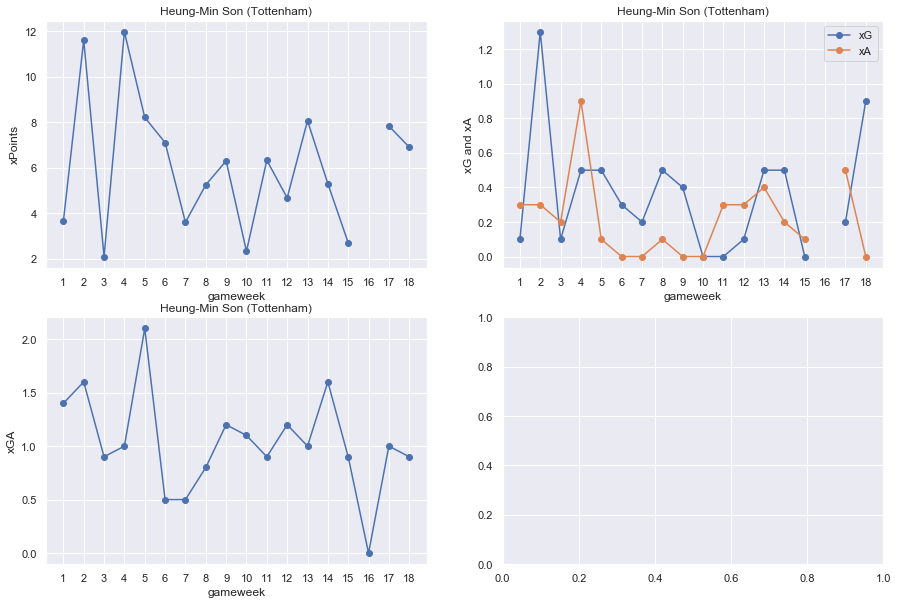

In [20]:
# find player index
name_string = 'Son'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 12

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Souc')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week12,cleansheet_week12,xA_week12,assists_week12,xPoints week 13,xG_week13,goals_week13,xGA_week13,cleansheet_week13,xA_week13,assists_week13,xPoints week 14,xG_week14,goals_week14,xGA_week14,cleansheet_week14,xA_week14,assists_week14,xPoints week 15,xG_week15,goals_week15,xGA_week15,cleansheet_week15,xA_week15,assists_week15,xPoints week 16,xG_week16,goals_week16,xGA_week16,cleansheet_week16,xA_week16,assists_week16,xPoints week 17,xG_week17,goals_week17,xGA_week17,cleansheet_week17,xA_week17,assists_week17,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,value form 10,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
449,1,10,250,NaN,NaN,6,215439,NaN,NaN,1,-1,3,-3,90.4,184,112,NaN,NaN,3,3,12.2,0.0,0,Tomas,5.6,21,5,96.1,29,18,False,373.8,30,10,1530,NaN,NaN,53,0,0,NaN,0,NaN,215439.jpg,4.5,0,0,Soucek,16.7,False,...,1.8,0.0,0.1,0.0,2.332871,0.0,0.0,1.1,0.0,0.0,0.0,3.135335,0.2,0.0,2.0,0.0,0.0,0.0,8.301194,0.6,1.0,1.2,0.0,0.0,0.0,3.106531,0.1,0.0,0.5,1.0,0.0,0.0,9.704837,0.7,1.0,0.1,1.0,0.1,0.0,6.061974,5.200499,5.002371,4.41799,4.339082,0.807874,1.143769,0.981226,1.859866,5.1,0.298052


In [16]:
my_starting11 = [12,232,558,277,254,302,37,141,506,202,388]
my_subs = [213,449,200,146]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,51,15.090909,5.5,4.616855,5.264045,5.164747,4.572763,4.788501,2.044378
232,Chilwell,Chelsea,61,14.038462,5.2,4.325934,2.415855,3.964657,4.223016,4.459838,1.751520
558,Coufal,West Ham,47,13.000000,4.0,3.929528,3.521823,4.062281,5.066359,4.086082,1.812556
277,Cancelo,Manchester City,58,11.960784,5.1,5.184563,6.339293,5.283904,5.242621,5.388530,2.152773
254,Salah,Liverpool,125,16.025641,7.8,6.594383,5.123065,5.936194,6.962089,6.295026,1.865173
302,Fernandes,Manchester Utd,113,16.923077,7.8,6.908142,8.465692,7.836187,6.629947,6.834588,2.055048
37,Grealish,Aston Villa,77,14.923077,6.5,5.777999,6.109345,5.194104,5.411033,5.622764,2.082246
141,Zaha,Crystal Palace,74,15.862069,5.8,5.007695,3.169914,4.134119,4.057375,4.926847,1.840865
506,Wilson,Newcastle Utd,66,14.915254,5.9,5.324580,4.025000,4.313792,4.967701,5.349766,2.072590



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
213,Meslier,Leeds United,46,17.073171,4.1,3.346380,4.036046,4.112844,3.431407,3.492604,1.560258
449,Soucek,West Ham,53,17.111111,4.5,4.281733,6.061974,5.200499,5.002371,4.417990,1.859866
200,Dallas,Leeds United,48,16.904762,4.2,2.904223,3.400775,3.674946,2.942802,3.025234,1.325590
146,Mitchell,Crystal Palace,39,9.117647,3.4,3.053050,4.962557,4.962557,2.536149,3.009591,1.545972


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)